In [1]:
import seaborn as sns
import pandas as pd

# Charger le dataset Titanic
df = sns.load_dataset('titanic')

# Afficher les premières lignes
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:


# Informations générales
print(" montre les types de colonnes et les valeurs manquantes :")
df.info()

# Statistiques des colonnes numériques
print("statistiques des colonnes numériques :")
print(df.describe())

: montre les types de colonnes et les valeurs manquantes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
statistiques des colon

In [3]:
print(" Valeurs manquantes par colonne :")
print(df.isnull().sum())
print("nTypes de données :")
print(df.dtypes)



 Valeurs manquantes par colonne :
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
nTypes de données :
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


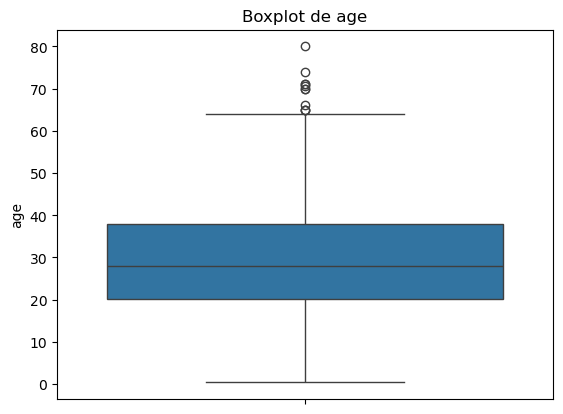

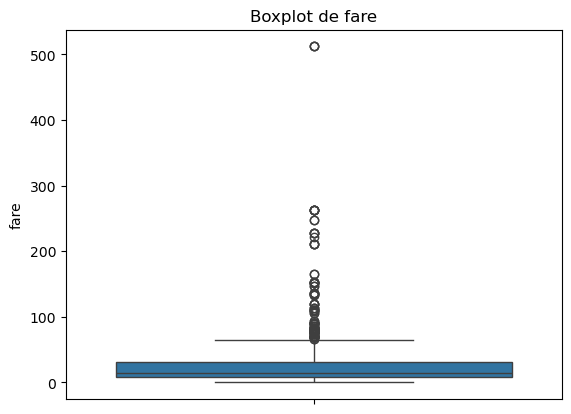

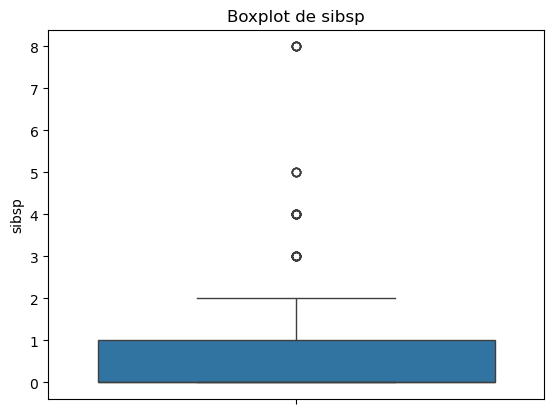

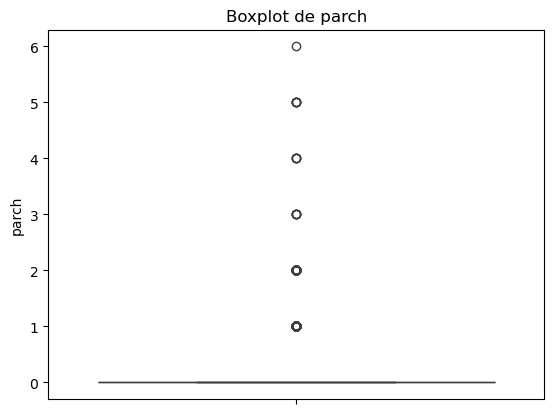

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'fare', 'sibsp', 'parch']

for col in numerical_features:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [7]:
import numpy as np
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < Q1 - 1.5*IQR) | (df['age'] > Q3 + 1.5*IQR)]
print(outliers)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True 

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} outliers: {len(outliers)}")


survived outliers: 0
pclass outliers: 0
age outliers: 11
sibsp outliers: 46
parch outliers: 213
fare outliers: 116


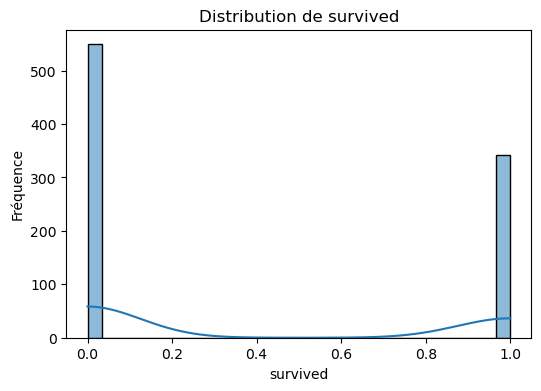

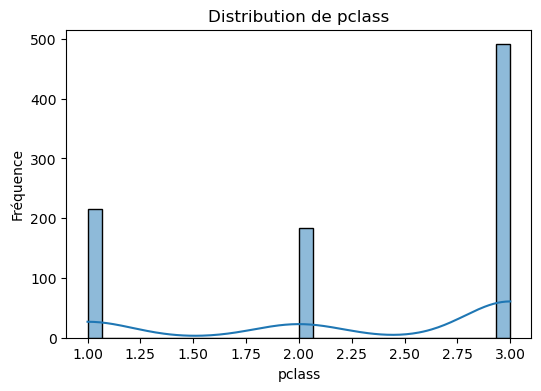

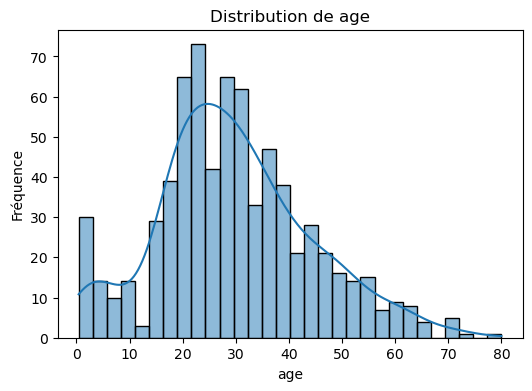

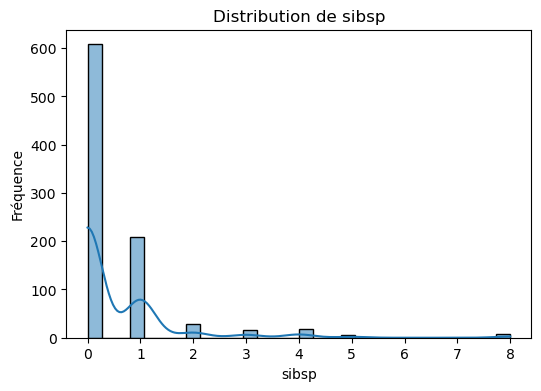

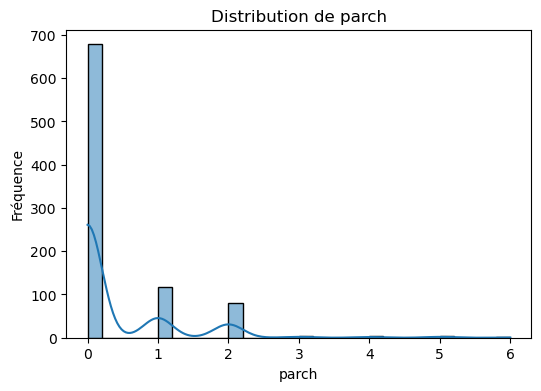

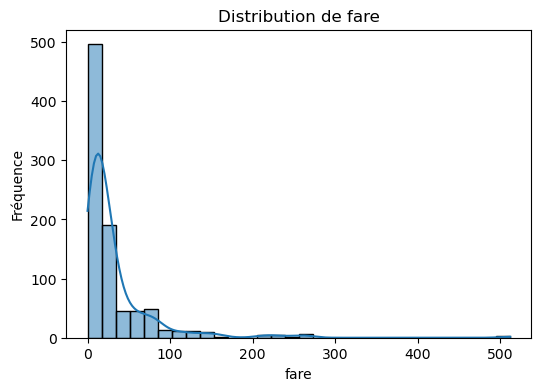

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes numériques
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)  # Histogramme avec courbe KDE
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()